# TASK 1 - Prediction using Supervised ML

To Predict the _percentage of marks_ of the students based on the _number of hours they studied_

### Author - Sujeet Kumar Pandit

In [66]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Acquisition & Description

In [75]:
#Importing the dataset
data = pd.read_csv(r"data/student_scores.csv")
print('Shape of the dataset:', data.shape)
data.head()

Shape of the dataset: (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


- The dataset contains **25** rows and **2** columns. 

### Data Description

In [17]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Observation:**

- The **average** percentage of **Scores** is **51.48**

- The **maximum** percentage of **Scores** is **95**

- The **maximum** study hours is **9.2**

- The **least** study hours is **1.10**

### Data Information

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Observation:**

- There are **no null values present** in this data set.

- **Each feature** seems to have **correct data type**.

### Exploratory Data Analysis

**Is there a relationship between Hours and Scores?**

<Figure size 1000x600 with 0 Axes>

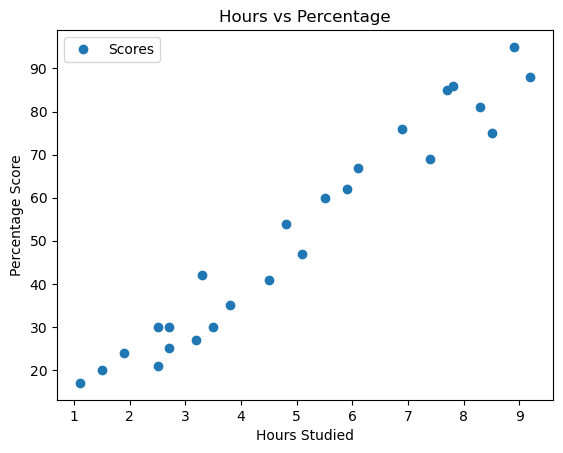

In [14]:
plt.figure(figsize=(10,6))
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

__Observation__<br/>

- From the graph above, Hours and Study are positively correlated.

### Visualising Pairwise correlation

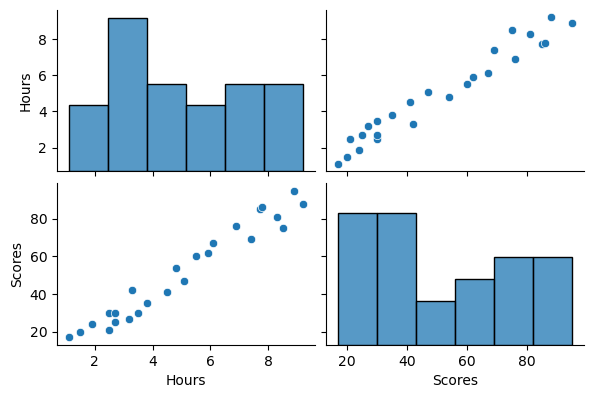

In [22]:
sns.pairplot(data, size = 2, aspect = 1.5)

### Calculating and plotting heatmap correlation

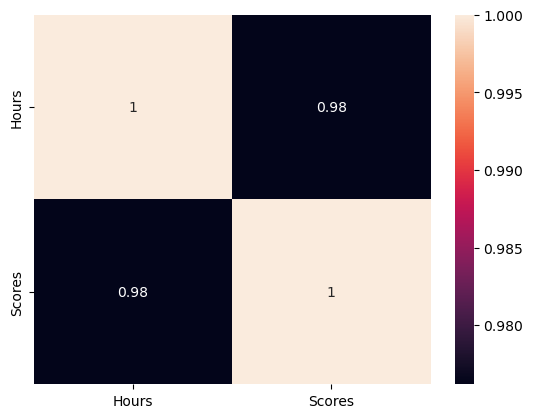

In [23]:
sns.heatmap(data.corr(), annot=True );

__Observation__

- **Strong** relationship between **Hours** and **Scores**

### Data Preparation

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [24]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [25]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [26]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

- Now we will **split** our **data** into **training** and **testing**

In [53]:
from sklearn.model_selection import train_test_split     #import train test library
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [54]:
print('Train cases as below')
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
x_train shape:  (20, 1)
y_train shape:  (20,)

Test cases as below
x_test shape:  (5, 1)
y_test shape:  (5,)


## Model Development & Evaluation

### Linear regression in scikit-learn

In [55]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  
linreg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


**Interpreting Model Coefficients**

In [56]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 2.018160041434683
Coefficients: [9.91065648]


### Visually Comparing the Predicted Marks with the Actual Marks

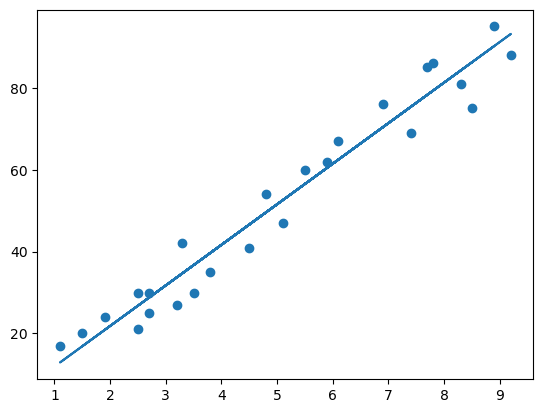

In [57]:
line = linreg.coef_*x+linreg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Using the Model for Prediction

Now that we have trained our algorithm, it's time to make some predictions.

In [58]:
print(x_test)                       # Testing data - In Hours
y_pred = linreg.predict(x_test)     # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [59]:
# Comparing Actual vs Predicted
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [60]:
hours = [9.25]
own_pred = linreg.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


### Evaluating the model

In [61]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### Conclusion

- **According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**